### 盧嘉威

## 課題 1-1:ヨーロピアン・コールオプション価格の計算
## あなたの VIG ポートフォリオに含まれる銘柄の中で，中間プロジェクトで選択した 3 銘柄につ いてについて，それぞれの銘柄を原資産とするヨーロピアン・コールオプションの価格を BS の 公式を利用して導出してください.
## (オプション課題として，3 銘柄以外の VIG で選んだ残りの銘柄について，同じ課題をこなして も良い)

### 8月15日-5月15日は92日になる。

In [4]:
import pandas as pd
import numpy as np
sony19=pd.read_csv("6758_2019.csv",encoding="SHIFT-JIS",header=1)
sony20=pd.read_csv("6758_2020.csv",encoding="SHIFT-JIS",header=1)


softbank1=pd.read_csv("9984_2019.csv",encoding="SHIFT-JIS",header=1)
softbank2=pd.read_csv("9984_2020.csv",encoding="SHIFT-JIS",header=1)


KEYENCE2=pd.read_csv("6861_2020.csv",encoding="SHIFT-JIS",header=1)
KEYENCE1=pd.read_csv("6861_2019.csv",encoding="SHIFT-JIS",header=1)

In [5]:
sony=pd.concat([sony19,sony20])
softbank=pd.concat([softbank1,softbank2])
KEYENCE=pd.concat([KEYENCE1,KEYENCE2])
sony.index=sony["日付"]
softbank.index=softbank["日付"]
KEYENCE.index=KEYENCE["日付"]

In [6]:
sony_1year=sony[78:328]
softbank_1year=softbank[78:328]
KEYENCE_1year=KEYENCE[78:328]

In [7]:
S0_sony=sony[327:328]["終値調整値"][0]
S0_softbank=softbank[327:328]["終値調整値"][0]
S0_KEYENCE=KEYENCE[327:328]["終値調整値"][0]
print("KEYENCE",KEYENCE[327:328]["終値調整値"])
print("softbank",softbank[327:328]["終値調整値"])
print("sony",sony[327:328]["終値調整値"])

KEYENCE 日付
2020-05-15    38870
Name: 終値調整値, dtype: int64
softbank 日付
2020-05-15    4574.0
Name: 終値調整値, dtype: float64
sony 日付
2020-05-15    6865
Name: 終値調整値, dtype: int64


In [8]:
#A,B,C
sigmaA=np.sqrt(np.var(((sony_1year["終値調整値"]/sony_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)
sigmaB=np.sqrt(np.var(((softbank_1year["終値調整値"]/softbank_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)
sigmaC=np.sqrt(np.var(((KEYENCE_1year["終値調整値"]/KEYENCE_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)

In [9]:
S0=np.array([S0_sony,S0_softbank,S0_KEYENCE])

K=np.array([6000,4000,35000])

T=92/365
r=0
siguma=np.array([sigmaA,sigmaB,sigmaC])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

In [10]:
d1

array([0.94803014, 0.62647006, 0.50509774])

In [11]:
d2

array([0.79335238, 0.35252981, 0.21301258])

In [12]:
import scipy.stats as si
si.norm.cdf(d1)

array([0.82844294, 0.73449666, 0.69325491])

In [13]:
import scipy.stats as si
si.norm.cdf(d2)

array([0.78621373, 0.63777952, 0.58434143])

In [14]:
call=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

## 表 1-1

In [15]:
import pandas as pd

pd.DataFrame([S0,K,call],columns=["sony","softbank","KEYENCE"],index=["原資産価格","行使価格","コール・オプション価格"])

,sony,softbank,KEYENCE
原資産価格,6865.000000,4574.000000,38870.000000
行使価格,6000.000000,4000.000000,35000.000000
コール・オプション価格,969.978449,808.469683,6494.868286


## 課題 1-2:プット・コール・パリティの利用
## BS の公式と，プット・コール・パリティの式を使って，ヨーロピアン・プットオプションの適正価 格を求める公式を導出してください.導出の過程も示すこと.

### C(t)-P(t)  = S(t)-K*B(t,T)
### B(t,T) = e**(-rt)
### C(t)=S0N(d1)-N(d2)Ke*(-rt)
### よって S0N(d1)-N(d2)Ke*(-rt)-P(t)  = S(t)-K*B(t,T)
### よって P(t)=S0N(d1)-N(d2)Ke*(-rt)-S(t)+K*e**(-rt)
### よって P(t)=S0N(d1)-N(d2)Ke(-rt)-S(t)+Ke**(-rt) 
### よって P(t)=S0N(d1)+(1-N(d2))Ke(-rt)-S0
### よって P(t)=S0(N(d1)-1)+(1-N(d2))Ke(-rt)
### 正規分布の性質より
### P(t)=N(-d2)*K*e**(-rt)-S0*N(-d1)

## 課題 1-3:ヨーロピアン・プットオプション価格の計算
## 課題 1-2 の結果を用いて，あなたの VIG ポートフォリオに含まれるそれぞれの銘柄を原資産と するヨーロピアン・プットオプションの価格(条件は，課題1-1と同じとする)を計算し，それをまとめた表 1-3 を作成してください.

In [16]:
S0=np.array([S0_sony,S0_softbank,S0_KEYENCE])

K=np.array([6000,4000,35000])

T=92/365
r=0
siguma=np.array([sigmaA,sigmaB,sigmaC])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

In [17]:
d1

array([0.94803014, 0.62647006, 0.50509774])

In [18]:
d2

array([0.79335238, 0.35252981, 0.21301258])

In [19]:
import scipy.stats as si
si.norm.cdf(-d1)

array([0.17155706, 0.26550334, 0.30674509])

In [20]:
import scipy.stats as si
si.norm.cdf(-d2)

array([0.21378627, 0.36222048, 0.41565857])

In [21]:
put=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

## 表 1-3

In [22]:
import pandas as pd

pd.DataFrame([S0,K,call,put],columns=["sony","softbank","KEYENCE"],index=["原資産価格","行使価格","コール・オプション価格","プット・オプション価格"])

,sony,softbank,KEYENCE
原資産価格,6865.000000,4574.000000,38870.000000
行使価格,6000.000000,4000.000000,35000.000000
コール・オプション価格,969.978449,808.469683,6494.868286
プット・オプション価格,104.978449,234.469683,2624.868286


### 表1-1と比較して，プットオプションよりは、コールオプションの価格が大きいことを確認した。これは、行使価格が原資産価格より低いからだと考えられる。

## 課題 2:オプション戦略の分析

## 課題 2-1:オプション戦略 S を 5/15 に実現するために，支払わなければならない費用(金額)は いくらか，計算して答えなさい.

In [23]:
import numpy as np
S0=np.array([S0_sony])

K=np.array([6865])

T=92/365
r=0
siguma=np.array([sigmaA])




d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

S0=np.array([S0_sony])


siguma=np.array([sigmaA])


call=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)
put=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

In [27]:
import pandas as pd

pd.DataFrame([S0,K,call,put],columns=["sony"],index=["原資産価格","行使価格","コール・オプション価格","プット・オプション価格"])

,sony
原資産価格,6865.000000
行使価格,6865.000000
コール・オプション価格,423.200041
プット・オプション価格,423.200041


###  Z=SONY
### 100株購入したとし、行使価格を6865.000000とすると、
### オプション戦略 S を 5/15 に実現するために、支払わなければならない費用(金額)は、100*(6865.000000+423.200041+423.200041)=771140.0082

## 課題 2-2 :以下のような 3 つのグラフ重ね合わせて一つのグラフ(図 2-2)として描写してくださ い.

### オプション戦略Sを構成する，コールオプション1単位のロングポジションの損益図

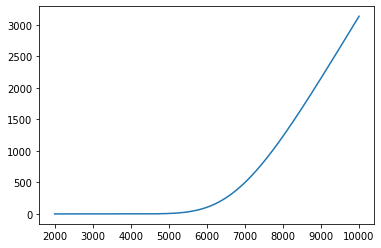

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
S0=np.arange(2000,10000,0.5)

K=np.array([6865])

T=92/365
r=0
siguma=np.array([sigmaA])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

plt.plot(S0,call_sony)

### オプション戦略Sを構成する，プットオプション1単位のロングポジションの損益図

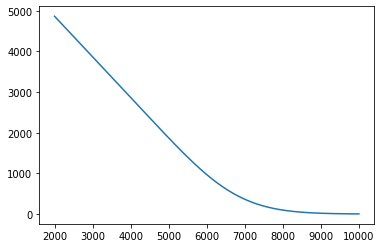

In [34]:
import matplotlib.pyplot as plt
S0=np.arange(2000,10000,0.5)

K=np.array([6865])

T=92/365
r=0
siguma=np.array([sigmaA])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

plt.plot(S0,put_sony)

### オプション戦略Sの損益図

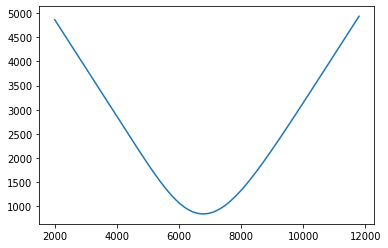

In [43]:
import matplotlib.pyplot as plt
S0=np.arange(2000,11800,0.5)

K=np.array([6865])

T=92/365
r=0
siguma=np.array([sigmaA])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

T=92/365
r=0
siguma=np.array([sigmaA])



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

plt.plot(S0,put_sony+call_sony)



## 課題 2-3:考察
## 課題 2-1 のオプション戦略 S のグラフを見て，このような戦略を構築するのはどのような場合に 有効か，言い換えると，どのような状況のときにオプション戦略 S を構築すると利益が期待さ れるか，自ら考えて答えてください.

### このような戦略を構築するのは、この株のボラティリティが高く、先行きが大きく上下し、この先原資産価格が満期日に購入日の原資産価格（6865円）と大きくかけ離れていると判断する時に、オプション戦略 S を構築すると利益が期待されると思う。

## オプション課題 3:感度分析

## 課題 3-1:横軸に原資産 Z のボラティリティ，縦軸に BS の公式を用いて計算されるヨーロ ピアン・コールオプションの価格と，ヨーロピアン・プットオプションの価格を取ったそれ ぞれのグラフ(図 3-1)を描いてください.さらに，グラフを見てそれぞれの価格がどのよう な理由でそのような形状になるのか，考察して書いてください.


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


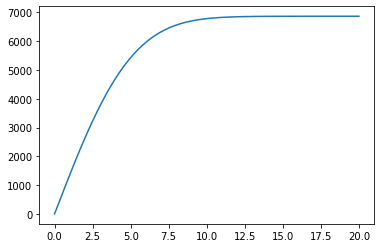

In [96]:
import matplotlib.pyplot as plt
S0=S0_sony

K=np.array([6865])

T=92/365
r=0

siguma=np.arange(0,20,0.0001)

import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

plt.plot(siguma,call_sony)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


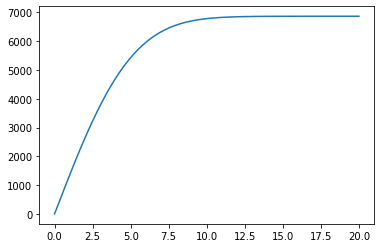

In [97]:
import matplotlib.pyplot as plt
S0=S0_sony

siguma=np.arange(0,20,0.0001)
K=np.array([6865])

T=92/365
r=0



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

plt.plot(siguma,put_sony)

In [98]:
call_sony[-1]

6864.996461620771

In [99]:
put_sony[-1]

6864.996461620771

In [103]:
call_sony-put_sony

array([nan,  0.,  0., ...,  0.,  0.,  0.])

### グラフを見てそれぞれの価格がどのような理由は、行使価格がゼロ時点の原資産の価格と同じの時、ボラティリティが高いほど、将来価格の変化不安定になりやすくなるため、オプション価格が上昇すると考えられる。しかし、ボラティリティが上昇すると、原資産の価格、つまり、6864.996461620771に収束することがわかった。つまり、ボラティリティがが大きくなっても、オプション価格が、原資産の価格を超えることはない。なぜなら、オプション価格が、原資産の価格を超えるならば、わざわざオプションで株を買う意味がなくなるからだ。また、プットオプションとコールオプションの収束が重なり合うことがわかった。

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


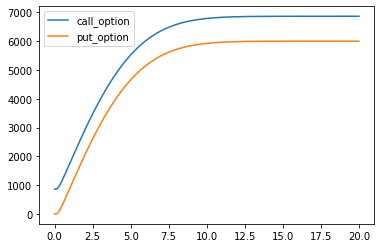

In [92]:
import matplotlib.pyplot as plt
S0=S0_sony

K=np.array([6000])

T=92/365
r=0

siguma=np.arange(0,20,0.0001)

import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)
put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)
plt.plot(siguma,call_sony,label="call_option")

plt.plot(siguma,put_sony,label="put_option")
plt.legend()

In [93]:
call_sony-put_sony

array([865., 865., 865., ..., 865., 865., 865.])

### また、行使価格を6865から、6000にシフトすると、プットオプションの収束全体がコールオプションより、865円下落することがわかった

## 課題 3-2:横軸に原資産 Z の 5 月 15 日当日の価格，縦軸に BS の公式を用いて計算されるヨ ーロピアン・コールオプションの価格とヨーロピアン・プットオプションの価格を取ったそ れぞれのグラフ(図 3-2)を描いてください.さらに，グラフを見てそれぞれの価格がどのよ うな理由で図のような形状になるのか，考察して書いてください.

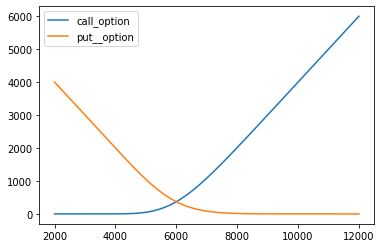

In [110]:
import matplotlib.pyplot as plt
S0=np.arange(2000,12000,1)

K=np.array([6000])

T=92/365
r=0

siguma=np.array([sigmaA])

import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

plt.plot(S0,call_sony,label="call_option")



import numpy as np
d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)

put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

plt.plot(S0,put_sony,label="put__option")
plt.legend()

### 行使価格6000円にすると、原資産 Z の 5 月 15 日当日の価格が6000円に変化する時に、プットオプションとコールオプションの価格が同じになる。原資産 Z の 5 月 15 日当日の価格が6000円より、高い場合、コールオプションの価格がプットオプションより高くなり、低い場合は、プットオプションがコールオプションの価格より高くなることがわかった。また、行使価格が6865円の場合は、グラフの分岐点が、6865円になることが容易に推測できる。

## 課題 3-3:横軸にオプションの行使価格，縦軸に BS の公式を用いて計算されるヨーロピア ン・コールオプションの価格とヨーロピアン・プットオプションの価格を取ったそれぞれの グラフ(図 3-3)を描いてください.さらに，グラフを見てそれぞれの価格がどのような理由で図のような形状になるのか，考察して書いてください.グラフの横軸になる行使価格は at the money を中心に適切な範囲を動かしてください.


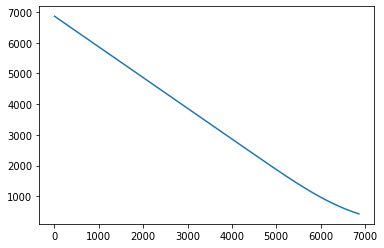

In [157]:
import matplotlib.pyplot as plt
S0=S0_sony

T=92/365

r=0

siguma=sigmaA

import numpy as np

K=np.arange(6865,0,-1)

d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)
call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)

plt.plot(K,call_sony)

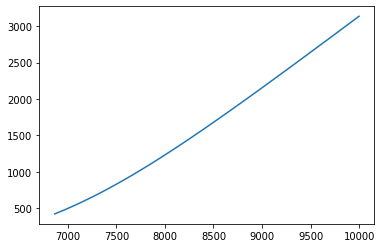

In [158]:
import matplotlib.pyplot as plt
S0=S0_sony

T=92/365

r=0

siguma=sigmaA

import numpy as np

K=np.arange(6865,10000,1)

d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
d2=d1-siguma*np.sqrt(T)
put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)

plt.plot(K,put_sony)

### ヨーロピアン・コールオプションの場合は、行使価格が、原資産の価格より低くなればなるほど、コールオプション価格が増加することがわかった。これ以上減少すると最終的には、6865になると予想される。
### また、ヨーロピアン・プットオプションの場合は、行使価格が、原資産の価格より高くなればなるほど、プットオプション価格が増加することがわかった。これ以上増えるとその増加は無限大であることがわかった。つまり、空売りのプットオプションのリスクは理論的無限大である。

## 課題 3-4:横軸にオプション満期までの残り時間，縦軸に BS の公式を用いて計算されるヨ ーロピアン・コールオプションの価格とヨーロピアン・プットオプションの価格を取ったそ れぞれのグラフ(図 3-4)を描いてください.さらに，グラフを見てそれぞれの価格がどのよ うな理由で図のような形状になるのか，考察して書いてください.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


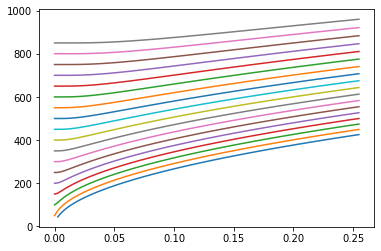

In [123]:
import matplotlib.pyplot as plt
S0=S0_sony

K=6865

T=np.arange(93,-1,-1)/365
r=0

siguma=np.array([sigmaA])

import numpy as np

for i in np.arange(6865,6000,-50):
    K=i
    d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
    d2=d1-siguma*np.sqrt(T)
    call_sony=S0*si.norm.cdf(d1)-K*np.exp(-r*T)*si.norm.cdf(d2)
    plt.plot(T,call_sony)
    



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


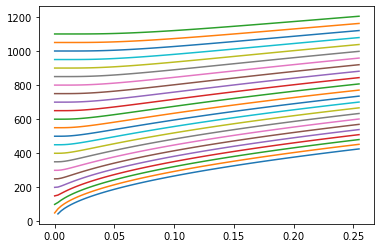

In [125]:
import matplotlib.pyplot as plt
import numpy as np

S0=S0_sony

K=6865

T=np.arange(93,-1,-1)/365
r=0

siguma=np.array([sigmaA])



for i in np.arange(6865,8000,50):
    K=i
    d1=(np.log(S0/K)+(r+(siguma**2)/2)*T)/(siguma*np.sqrt(T))
    d2=d1-siguma*np.sqrt(T)
    put_sony=K*np.exp(-r*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)
    plt.plot(T,put_sony)


### ヨーロピアン・コールオプションの場合は、満期になるにつれて、・コールオプション価格が減少することがわかった。また、行使価格が、原資産の価格より低くなればなるほど、ヨーロピアン・コールオプションの価格グラフが上にシフトし、これ以上低くなると最終的には、6865円になる水平直線になることが予想される。
### また、ヨーロピアン・プットオプションの場合は、満期になるにつれて、プットプション価格も同様に減少することがわかった。また、行使価格が、原資産の価格より高くなればなるほど、プットオプションの価格グラフも上にシフトし、これ以上増えると最終的には、無限大になることが予想される。

## テーマ X:感想，コメント

### このレポート作成に費やした総時間(概算)は、20時間である。中間レポートと、期末レポートをやり抜くことで、オプションの理解が深くなったし、プログラミングの能力も大きく向上した。また、資産運用や、ポートフォリオ オプティマイザーの知識もとても深くなり、資産運用や、ポートフォリオ オプティマイザーの卒業論文を書くために、この授業を取る意味を感じた。